<a href="https://colab.research.google.com/github/khanhne28/BT_AI/blob/main/week11/CNN_model(fashion_mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(train_x, train_y), (test_x, test_y)= fashion_mnist.load_data()

In [ ]:
train_x.shape,train_y.shape

((60000, 28, 28), (60000,))

Text(0.5, 1.0, 'So: 8')

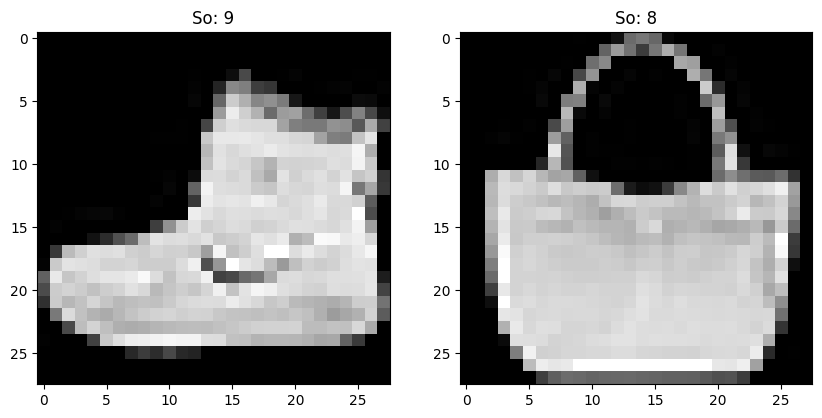

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(train_x[0],cmap='gray')
plt.title('So: {}'.format(train_y[0]))

plt.subplot(122)
plt.imshow(train_x[100],cmap='gray')
plt.title('So: {}'.format(train_y[100]))

<ipython-input-38-a1d114005212>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


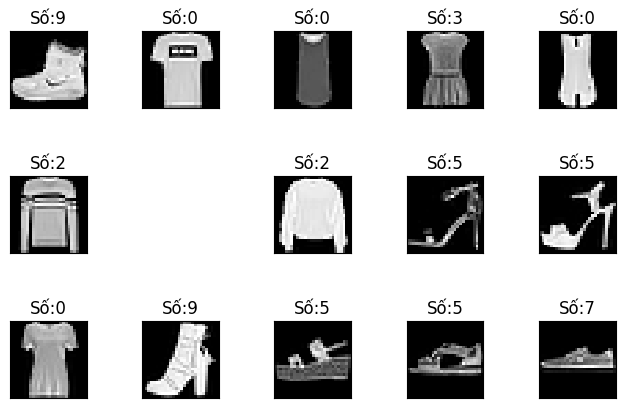

In [ ]:
for i in range(15) :
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_x[i], cmap='gray', interpolation='none')
  plt.title('Số:{}'.format(train_y[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
train_x = train_x.reshape((60000,28,28,1))    
test_x = test_x.reshape((10000, 28,28,1))
train_x.shape,test_x.shape

train_x=train_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
from keras.layers.preprocessing.normalization import Normalization
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam
batch_size = 64 #lô để học
epochs = 20 #số lần học
classes = 10 #lớp (loại) học (phân loại bao nhiêu loại học)

#bộ CNN để làm nổi bật đặc điểm
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'linear',input_shape = (28,28,1),padding = 'same')) #32 là số lần tích chập
from keras.layers.activation import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'linear', padding = 'same'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
#bộ ANN để phân loại
model.add(Flatten())
model.add(Dense(128,activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

train = model.fit(train_x,train_y,batch_size = batch_size, epochs = epochs, verbose = 1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/MyDrive/models/model_CNN.h5')

Test lost:  159.24765014648438
Test accuracy 0.8420000076293945


Text(0.5, 1.0, 'Training & Training Accuracy')

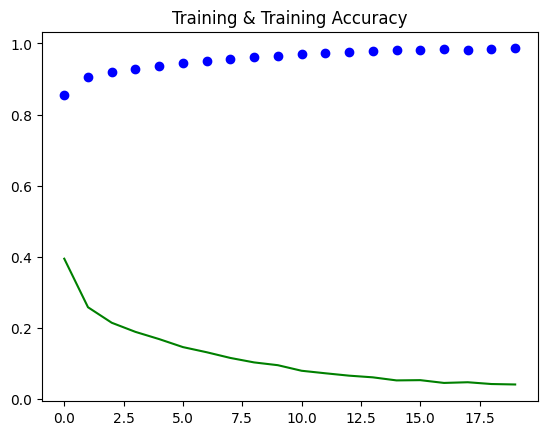

In [ ]:
eval = model.evaluate(test_x,test_y,verbose = 0)
print('Test lost: ',eval[0])
print('Test accuracy',eval[1])
accuracy = train.history['accuracy']
val_accuracy = train.history['loss']
epochs = range (len(accuracy))
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy, 'g',label = 'Test Accuracy')
plt.title('Training & Training Accuracy')